<a href="https://colab.research.google.com/github/mobndash/Exploratory-Data-Analysis-EDA-Techniques/blob/main/EDA_Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads (1).csv")

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0




# **> Standardization, also called Z-Score Normalization**
Always apply after train test split



---

Important :
Scaling is important for:

Distance-based algorithms: KNN, K-Means, DBSCAN

Gradient-based optimization: Logistic Regression, SVM, Neural Networks

PCA / LDA (since they rely on variance & covariance)

❌ Scaling not needed (or less important) for:

Tree-based models: Decision Trees, Random Forests, Gradient Boosted Trees (XGBoost, LightGBM, CatBoost)

Rule-based models

Rules of Thumb

Classification with Trees (RF, XGBoost, LightGBM) → No scaling needed.

Logistic Regression, SVM, KNN, Neural Nets, PCA, Clustering → Always scale.

Mixed case → safer to scale.



In [ ]:
X = df.drop(columns=["Purchased", "Gender"], axis = 1)
y = df["Purchased"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((320, 3), (80, 3))



# **> StandardScaler**
Can only be applied for Numerical columns
Input is DF and output is numpy array



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler.mean_

array([1.56890664e+07, 3.78718750e+01, 7.02812500e+04])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [ ]:
np.round(X_train_scaled.describe(), 1)

,User ID,Age,EstimatedSalary
count,320.0,320.0,320.0
mean,0.0,-0.0,0.0
std,1.0,1.0,1.0
min,-1.7,-1.9,-1.6
25%,-0.9,-0.8,-0.8
50%,0.0,-0.1,0.0
75%,0.8,0.7,0.5
max,1.8,2.2,2.3




# **> Normalization**
Min-Max Scaling



In [ ]:
df = pd.read_csv("/content/Social_Network_Ads (1).csv")

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.dtypes

,0
User ID,int64
Gender,object
Age,int64
EstimatedSalary,int64
Purchased,int64


In [ ]:
numeric_columns = [col for col in df.columns if df[col].dtypes == "int64"]
numeric_columns

['User ID', 'Age', 'EstimatedSalary', 'Purchased']

In [ ]:
df[['User ID', 'Age', 'EstimatedSalary', 'Purchased']]


,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


In [ ]:
np.round(df.describe())

,User ID,Age,EstimatedSalary,Purchased
count,400.0,400.0,400.0,400.0
mean,15691540.0,38.0,69742.0,0.0
std,71658.0,10.0,34097.0,0.0
min,15566689.0,18.0,15000.0,0.0
25%,15626764.0,30.0,43000.0,0.0
50%,15694342.0,37.0,70000.0,0.0
75%,15750363.0,46.0,88000.0,1.0
max,15815236.0,60.0,150000.0,1.0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

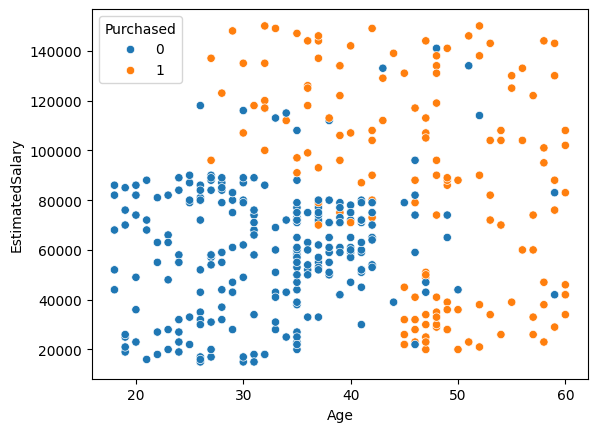

In [ ]:
sns.scatterplot(df, x = df["Age"], y = df["EstimatedSalary"], hue = df["Purchased"])


In [ ]:
X = df.drop(columns = ["Gender", "User ID", "Purchased"])
y = df["Purchased"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
y_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [ ]:
X_train_scaled.describe(), df.describe()

(              Age  EstimatedSalary
 count  320.000000       320.000000
 mean     0.473140         0.409491
 std      0.243036         0.255041
 min      0.000000         0.000000
 25%      0.285714         0.207407
 50%      0.452381         0.414815
 75%      0.642857         0.540741
 max      1.000000         1.000000,
             User ID         Age  EstimatedSalary   Purchased
 count  4.000000e+02  400.000000       400.000000  400.000000
 mean   1.569154e+07   37.655000     69742.500000    0.357500
 std    7.165832e+04   10.482877     34096.960282    0.479864
 min    1.556669e+07   18.000000     15000.000000    0.000000
 25%    1.562676e+07   29.750000     43000.000000    0.000000
 50%    1.569434e+07   37.000000     70000.000000    0.000000
 75%    1.575036e+07   46.000000     88000.000000    1.000000
 max    1.581524e+07   60.000000    150000.000000    1.000000)

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

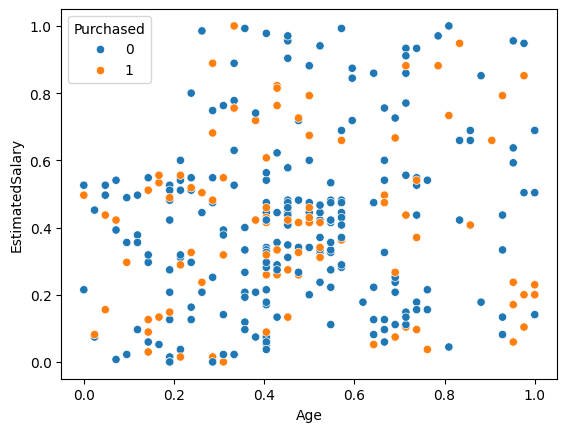

In [ ]:
sns.scatterplot(X_train_scaled, x = X_train_scaled["Age"], y = X_train_scaled["EstimatedSalary"], hue = df["Purchased"])



> MaxAbsScaling
MaxAbsScaler in scikit-learn scales each feature by dividing by its maximum absolute value.
This means values get transformed into the range [-1, 1], but unlike MinMaxScaler, it doesn’t shift/center the data. It’s very useful when your data is sparse (lots of zeros).



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

# Example dataset
df = pd.DataFrame({
    "feature1": [1, -2, 3, -4, 5],
    "feature2": [10, 20, -30, 40, -50]
})

print("Original Data:")
print(df)

# Apply MaxAbsScaler
scaler = MaxAbsScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("\nAfter MaxAbsScaler:")
print(df_scaled)


Original Data:
   feature1  feature2
0         1        10
1        -2        20
2         3       -30
3        -4        40
4         5       -50

After MaxAbsScaler:
   feature1  feature2
0       0.2       0.2
1      -0.4       0.4
2       0.6      -0.6
3      -0.8       0.8
4       1.0      -1.0




> Robust Scaling
RobustScaler is another scaler in scikit-learn that’s very useful when your data has outliers.

How it works

Subtracts the median

Scales according to the IQR (interquartile range: 25th percentile → 75th percentile)

This makes it robust to outliers, unlike StandardScaler (which uses mean & std).



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

# Example dataset with outliers
df = pd.DataFrame({
    "feature1": [10, 12, 14, 16, 1000],   # 1000 is an outlier
    "feature2": [1, 2, 3, 4, 5]
})

print("Original Data:")
print(df)

# Apply RobustScaler
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("\nAfter RobustScaler:")
print(df_scaled)


Original Data:
   feature1  feature2
0        10         1
1        12         2
2        14         3
3        16         4
4      1000         5

After RobustScaler:
   feature1  feature2
0      -1.0      -1.0
1      -0.5      -0.5
2       0.0       0.0
3       0.5       0.5
4     246.5       1.0
